# Dynamic Programming: The State-Transition Approach
## Ze Yang, 
### 2021-01-16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
# Four Steps to Solve a DP Problem
- Step 1. Define the state of the system.
- Step 2. Derive the state transition equation that bridges the solution to the final problem and the solution(s) to the preceding/smaller problems.
- Step 3. Identify the dimension, order, and boundary condistions to initialize memoization table (we'll simply call it "DP table").
- Step 4. Fill the table according to the state transition equation.

# Fibonacci Sequence
Let $f(n)$ be the $n$-th term of the Fibonacci Sequence. f(n) follows the *one-dimensional*, *second-order* state transition dynamics as follows:
$$
f(n) = \begin{cases}
f(n-1) + f(n-2) & n>2 \\
1 & n=0,1
\end{cases}
$$

Convince yourself that:
- 1 = **Number of Dimensions** = Number of subscripts in the state function (we see $n$ in this case) = Dimension of the memoization table (we need an 1d-array in this case).
- 2 = **Order (in the 1st Dimension)** = How far back in the memoization table we need to look in this dimension = Number of initial values needed to construct "empty" DP table.

# Binomial Coefficients & Pascal's Rule
Let $b(\color{blue}{n}, \color{red}{k})$ be the coefficient of the term $x^{\color{red}{k}}$ in the polynomial expansion of $(1+x)^{\color{\blue}{\color{blue}{n}}}$. How to find $b(n, k)$?

- The fastest solution is obvious if one knows the binomial theorem $(1+x)^n = \sum_{k=1}^n \binom{n}{k} x^k = \sum_{k=1}^n \frac{n!}{k!(n-k)!} x^k$. This is going to take $O(k)$ time and $O(1)$ space only.
- For our purposes, let's take a step back and consider a "worse" solution that's linked to *Pascal's Rule*:
$$
b(n, k) = \begin{cases}
b(n-1, k-1) + b(n-1, k) & n\geq k > 0\\
1 & k=0 \\
0 & n=0, k>0
\end{cases}
$$
- Number of dimension = 2. Order = (1, 1).
- Implemetation Caveat: Be careful about 0-based numbering. If the state can goes back to 0 then the DP table needs N+1 rather than N on that dimension.

In [2]:
def binomial_coef(N, K):
    # Step 1:
    # State is (n, k).
    
    # Step 2:
    # b(n, k) = b(n-1, k-1) + b(n-1, k)
    
    # Step 3:
    # Dimension = 2, Order = (1, 1), Boundary condtions b(0, :) = b(:, 0) = 1

    dp = np.zeros((N+1, K+1), dtype=np.int64)
    dp[:, 0] = 1
    dp[0, 1:] = 0
    
    # Step 4:
    for n in range(1, N+1):
        for k in range(1, K+1):
            dp[n, k] = dp[n-1, k-1] + dp[n-1, k]
    print(dp)
    return dp[N, K]

binomial_coef(10, 5)

[[  1   0   0   0   0   0]
 [  1   1   0   0   0   0]
 [  1   2   1   0   0   0]
 [  1   3   3   1   0   0]
 [  1   4   6   4   1   0]
 [  1   5  10  10   5   1]
 [  1   6  15  20  15   6]
 [  1   7  21  35  35  21]
 [  1   8  28  56  70  56]
 [  1   9  36  84 126 126]
 [  1  10  45 120 210 252]]


252

---

# 1. Subarray Problems
- A **subarray** of a given array `x` (of length $n$) is a *continguous* component of it. That is, `x[i:j]`, $0 \leq i < j \leq n$.
- Total number of distinct subarrays is therefore $1+...+n = n(n+1)/2 = O(n^2)$. This usually implies an $O(n^2)$ brute force solution. 
- The fruitful part of this type of problems is usually defining the state cleverly to reduce TC to $O(n)$.
 
### 1.1 Maximum Sum of Subarray
Given an array `x`, find the maximum sum of subarrays of `x`.
- Step 1.  Let $f(n)$ be the maximum sum of all subarrays **that ends at $n$**.
- Step 2.  Now consider all subarrays ending at $n+1$. $f(n)+x_{n+1}$ is guaranteed to be greater or equal to everything else except for the subarray `x[n:n+1]`, i.e. $x_{n+1}$.
$$
f(n) = \max\{f(n-1)+x_{n}, x_{n}\}
$$
- Note that the space complexity can still be optimized to $O(1)$ in the same way as we did for Fibonacci sequence. Need one extra variable to remember `max(dp)`

In [3]:
def max_subarray_sum(x):
    # step 3. boundary condition f(1) = x_1
    if not len(x): return 0
    dp = np.zeros(len(x), dtype=np.int64)
    dp[0] = x[0]
    
    # step 4.
    for i in range(1, len(x)):
        dp[i] = max(dp[i-1]+x[i], x[i])
    print(dp)
    return max(dp)

max_subarray_sum([-2,1,-3,4,-1,2,1,-5,4])

[-2  1 -2  4  3  5  6  1  5]


6

In [4]:
def max_subarray_sum_O1space(x):
    # step 3. boundary condition f(1) = x_1
    if not len(x): return 0
    fn = x[0]
    max_fn = fn
    
    # step 4.
    for i in range(1, len(x)):
        fn = max(fn + x[i], x[i])
        max_fn = max(max_fn, fn)
    return max_fn

max_subarray_sum_O1space([-2,1,-3,4,-1,2,1,-5,4])

6

### 1.2 Maximum Subarray Product (Homework)

Gieven an array `x`, find the maximum **product** of the subarrays of `x`.
- Is the state representation used in 1.1 still applicable? (How about the negative items?)



---

# 2. Subsequence Problems
- A subsequence of a given array `s` of length $n$ is generated by choosing some items from `s` while *preserving their relative order*.
- One can "choose" subsequence of length $\forall m$: $1 \leq m \leq n$. Therefore the number of distinct subsequence is
$$
\binom{n}{1} + \binom{n}{2} + ... + \binom{n}{n} = 2^n
$$
This implies an exponential time brute-force solution.
- Often times, a DP solution can improve the solution to $O(n^2)$, with two-dimensional state $f(i, j)$ representing some-sort-of optimum with respect to the scope of all subsequeces of `s[i:j]`.

### 2.1. Longest Common Subsequence
Given two strings `s1` and `s2`, return the length of their longest common subsequence.
- Step 1. Let $f(i, j)$ be the LCS length of `s1[0:i]` and `s2[0:j]`
- Step 2. State transition equation:
$$
f(i, j) = \begin{cases}
f(i - 1, j - 1) & s_{1}[i] = s_{2}[j]\\
\max\{f(i, j - 1), f(i - 1, j)\} &  s_{1}[i] \ne s_{2}[j]\\
0 & n_1 = 0 ~\text{or}~ n_2 = 0
\end{cases}
$$

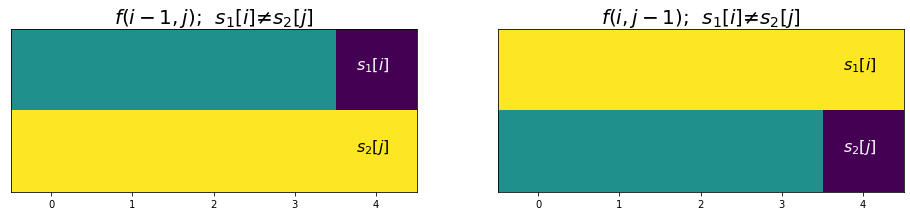

In [6]:
plot_2_1()

In [7]:
def longest_common_subseq(s1, s2):
    # step 3.
    n1, n2 = len(s1), len(s2)
    if n1==0 or n2==0: return 0
    dp = np.zeros((n1+1, n2+1), dtype=np.int64)
    
    # step 4.
    for i in range(1, n1+1):
        for j in range(1, n2+1):
            if s1[i-1] == s2[j-1]:
                dp[i, j] = dp[i-1, j-1] + 1
            else:
                dp[i, j] = max(dp[i-1, j], dp[i, j-1])
    print(dp)
    return dp[n1, n2]

longest_common_subseq('abcde', 'bce')

[[0 0 0 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 1 2 2]
 [0 1 2 2]
 [0 1 2 3]]


3

### 2.2. Longest Palindromic Subsequence
Given a string `s`, find the longest palindromic subsequence's length in `s`.
- Step1. Let $f(i, j)$ be the length of LPS of substring `s[i,j]`
- Step2. For state (i,j), there are only 2 cases:
    - (1) If $s_i = s_j$, adding these 2 characters preserves Palindromicity.
    - (2) Otherwise, the LPS between $i,j$ **must not contain $s_i$ and $s_j$ at the same time**. Hence it's either $f(i+1, j)$ or $f(i, j-1)$.
    
The state-transition equation is:
$$
f(i,j) = \begin{cases}
1 & i=j \\
f(i+1, j-1) + 2 & s_i = s_j; i<j \\
\max\{f(i, j-1), f(i+1, j) \} & s_i \ne s_j; i<j
\end{cases}
$$

- The boundary condition is different here: it's the main diagonal. The states evolve $\nearrow$ as `i--, j++`.

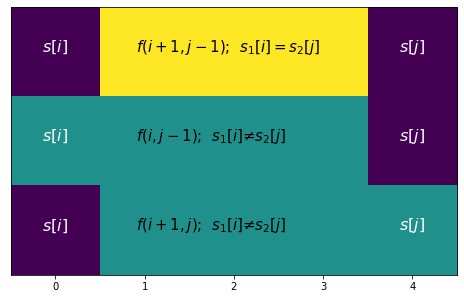

In [8]:
plot_2_2()

In [9]:
def longest_palindromic_subseq(s):
    # Step3. boundary condition
    n = len(s)
    if n <= 1: return 1
    dp = np.zeros((n, n), dtype=np.int64)
    for i in range(n): dp[i, i] = 1
    
    # Step4.
    for diag in range(1, n):
        for i in range(n-diag):
            j = i + diag
            if s[i] != s[j]:
                dp[i, j] = max(dp[i, j-1], dp[i+1, j])
            else:
                dp[i, j] = dp[i+1, j-1] + 2
    print(dp)
    return dp[0, -1]

longest_palindromic_subseq('asabsbbsaab')

[[1 1 3 3 3 3 3 5 7 8 8]
 [0 1 1 1 3 3 3 5 6 6 6]
 [0 0 1 1 1 3 3 4 6 6 6]
 [0 0 0 1 1 3 3 4 4 4 6]
 [0 0 0 0 1 1 2 4 4 4 4]
 [0 0 0 0 0 1 2 2 2 2 4]
 [0 0 0 0 0 0 1 1 1 2 4]
 [0 0 0 0 0 0 0 1 1 2 2]
 [0 0 0 0 0 0 0 0 1 2 2]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


8

### 2.3. Longest Increasing Subsequence (Homework)
Given an array $x$ of numbers, return the length of the longest strictly increasing subsequence.
- Our generic DP solution yields $O(n^2)$ time complexity.
- There exists an $O(n\log n)$ solution.

---
# Side Note: DP Table Traveral Order

Rule of thumbs:
- Start from the states that are closer to boundary conditions.
- In each iteration, all the states that appears on the RHS of the state-transition equation must have already been computed earlier in the traveral loop.
- The final state (solution to the "biggest" problem in terms of the scope) should be computed at the last iteration.

### LCS (2.1) DP Table


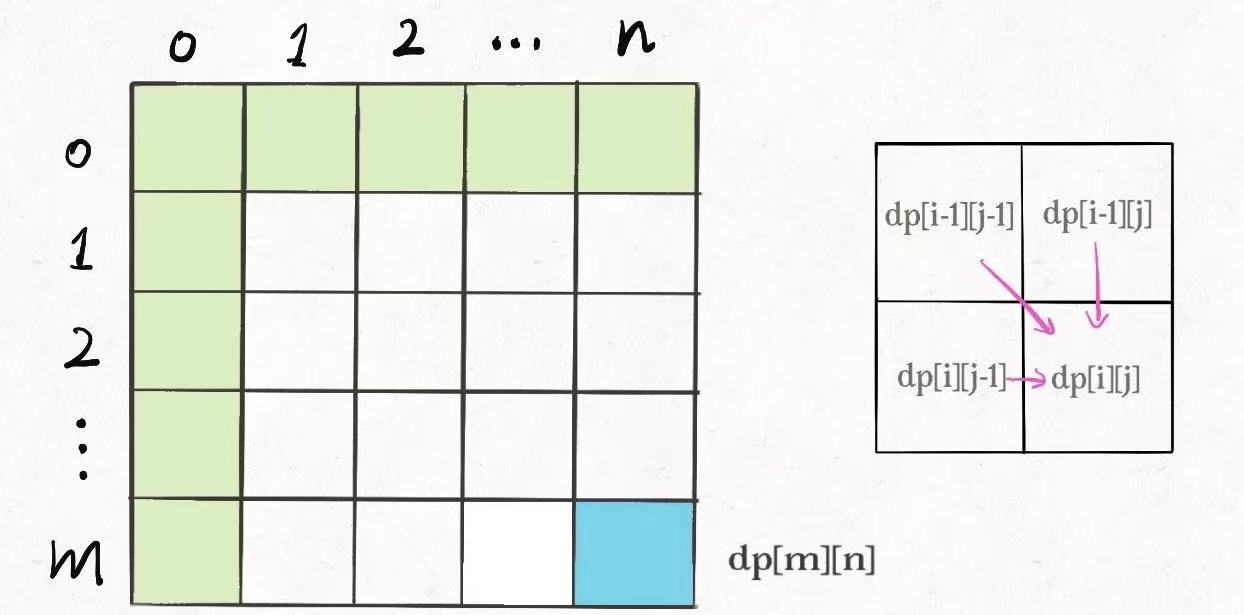



### LPS (2.2) DP Table
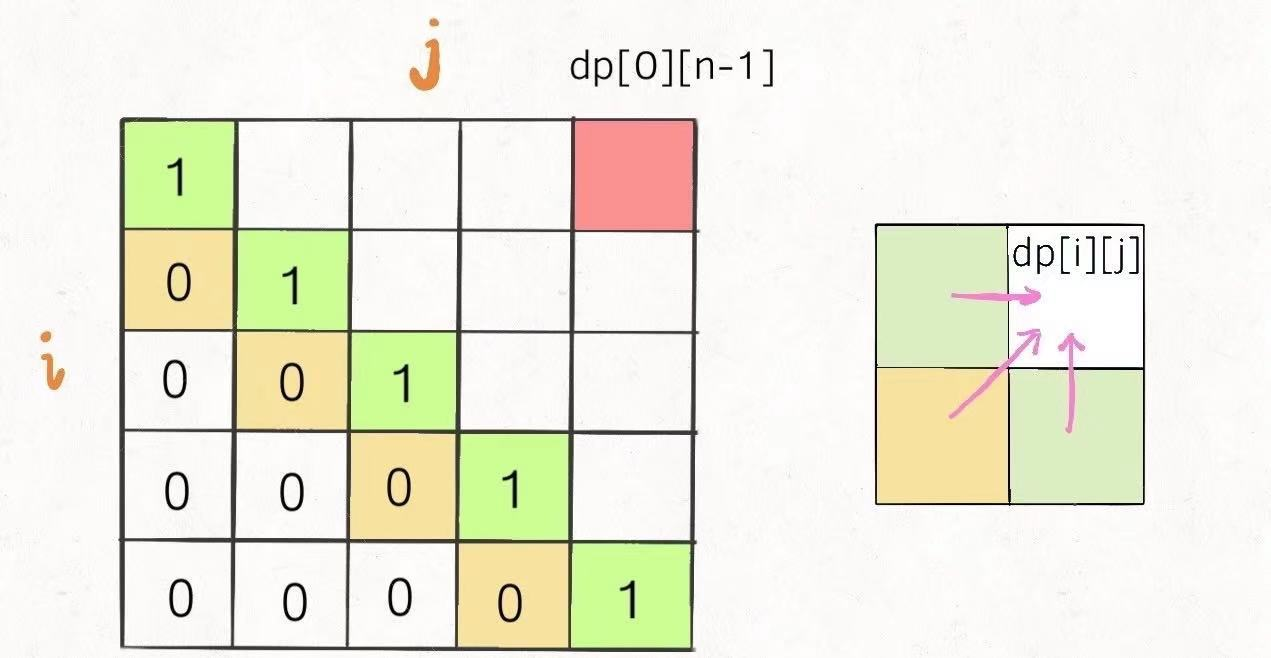



---

# 3. Knapsack Problems
### 3.1. 0-1 Knapsack.
There are $K$ items labeled as $1\leq k \leq K$. The $k$-th item weights $w_k$ and worth $v_k$. Put items in a knapsack of capacity $N$ to achieve maximum total value.
- A constrained integer program:
$$
\begin{split}
      & \max_{\mathbf{x}}~~\mathbf{x}^{\top} \mathbf{v} \\
s.t.~~&\mathbf{x}^{\top} \mathbf{w} \leq N \\
&x_k = 0~\text{or}~1~~\forall k = 1,2,...,K
\end{split}
$$
- Step 1. Let $f(k, n)$ be the maximum total value using the first $k$ items to fill capacity $n$.
- Step 2. Consider the state transition from $k-1$ to $k$. There are really only 2 cases:
    - (1). **Not keeping the $k$-th item.** The total value will be the same as $f(k-1, n)$.
    - (2). **Keeping the $k$-th item.** When doing so, keeping the first $k-1$ item requires at least $n-w_k$ capacity. So the total value will be $f(k-1, n-w_k) + v_k$. If $n-w_k < 0$, then we can't keep item $k$ anyway. Choose (1).
    
State (k,n) is the maximum of these 2 choices. The state-transition equation is therefore:
$$
f(k, n) = \begin{cases}
0 & k=0\text{ or }n=0; \\
f(k-1, n) & k>0, n>0, n-w_k < 0  \\
\max\{f(k-1, n), f(k-1, n-w_k) + v_k\} & \text{otherwise}\\
\end{cases}
$$

In [10]:
def knapsack_01(ws, vs, N):
    # Step3. boundary condition
    if not ws or N==0: return 0
    K = len(ws)
    dp = np.zeros((K+1, N+1), dtype=np.int64)
    
    # Step4.
    for k in range(1, K+1):
        wk, vk = ws[k-1], vs[k-1]
        for n in range(1, N+1):
            dp[k, n] = max(
                dp[k-1, n], 
                dp[k-1, n-wk] + vk if n-wk>=0 else -1
            )
    print(dp)
    return dp[K, N]

knapsack_01([10, 20, 30], [60, 100, 120], 50)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60
   60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
   60  60  60  60  60  60  60  60  60  60  60  60  60  60  60]
 [  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60
   60  60 100 100 100 100 100 100 100 100 100 100 160 160 160 160 160 160
  160 160 160 160 160 160 160 160 160 160 160 160 160 160 160]
 [  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60
   60  60 100 100 100 100 100 100 100 100 100 100 160 160 160 160 160 160
  160 160 160 160 180 180 180 180 180 180 180 180 180 180 220]]


220

### 3.2. Complete Knapsack (Ways of Coin Change)
How many different ways to completely fill bag capacity $N$ with any number of items. It is allowed to use copies of items.

- An equivalent problem in disguise: **Ways of Coin Change**: given coins of different *denominations* and a total amount of money $N$. Find the number of coin combinations that make up that amount. Assume we have infinite number of each kind of coin.

- Step1. Let $f(k,n)$ be the number of ways to sum up to $n$ using only the first $k$ ($k\geq1$) kinds of coins.
- Step2. In order to reach state $(k, n)$, there are 2 complementary choices (paths) that span the entire options space:
    - (1). **Do not use the $k^{th}$ kind of coin at all**. The number of ways to do this is $f(k-1, n)$: using only the first $k-1$ kinds to fill $n$.
    - (2). **Use at least 1x $k^{th}$ kind of coin**. The number of ways won't change when we remove that 1x$k^{th}$-kind of coin, because it has to be in the combination. Therefore, we have $f(k, n-c_k)$ ways for this option. Note that if $n-c_k < 0$, this option is not valid.
    
Since (1) and (2) are complementary, the total number of ways = sum of the 2:
$$
f(k,n) = \begin{cases}
1 & n=0 \\
0 & k=0, n>0 \\
f(k-1, n) & n-c_k < 0; n,k>0\\
f(k-1, n) + f(k, n-c_k) & n-c_k \geq 0; n,k>0
\end{cases}
$$

In [11]:
def complete_knapsack(ws, N):
    # Step3. boundary condition
    if N==0: return 1
    if not ws: return 0
    K = len(ws)
    dp = np.zeros((K+1, N+1), dtype=np.int64)
    dp[:, 0] = 1
    
    # Step4.
    for k in range(1, K+1):
        wk = ws[k-1]
        for n in range(1, N+1):
            dp[k, n] = dp[k-1, n] + dp[k, n-wk] if n-wk>=0 else dp[k-1, n]
    print(dp)
    return dp[K, N]

complete_knapsack([1,2,5], 5)

[[1 0 0 0 0 0]
 [1 1 1 1 1 1]
 [1 1 2 2 3 3]
 [1 1 2 2 3 4]]


4

### 3.3. Subset 0-1 Knapsack (Homework)
Given an array $x$ containing positive integers, find whether the array can be partitioned into two subsets, such that their sums are equal.

*Analysis*: We can first find the total sum of $x$. The equal subset sum, if exists, must equal to `sum(x)/2`. Therefore, this problem is equivalent to *subset 0-1 knapsack*: Given items weights $x$. Deternine whether there's a subset of items whose weights sum to capacity $N=$`sum(x)/2`.

---

# 4. Three Dimensional Problem: An Example
### Stock Trading with Oracle Price Series
Suppose your-future-self time-travels into our reality and gives you future stock price series $p$ from now to now+$n$ days. Suppose you are only allowed to trade $m$ times, and you are only allowed to hold 1 (long) position at a time. What's the maximum profit that's possible?

- The hard part of this is to correct define the state that enumerates all possible scenarios. Consider (t, k, $\mathbb{1}_{pos}$) representing: at time $t$, have already traded $k$ times during `1:t-1`,  and whether holding a position at this instant ($\mathbb{1}_{pos}=1\text{ or }0$). Let $f(t, k, \mathbb{1}_{pos})$ be the maximum profit to reach this state.
- We then need to figure out how to reach both $f(t, k, 0)$ and $f(t, k, 1)$.
    - There are 2 ways to reach $f(t, k, 1)$:
        - Hold the existing $k$-th position that's already there at $t-1$: $f(t-1, k, 1)$
        - Enter new position at $t$ @ price $p_t$: $f(t-1, k-1, 0) - p_t$.
        $$
        f(t, k, 1) = \max\{\underbrace{f(t-1, k-1, 0)- p_t}_{\text{Buy at } t}, \underbrace{f(t-1, k, 1)}_{\text{Rest}}\}
        $$
    - There are also 2 ways to reach $f(t, k, 0)$:
        - Do nothing from $t-1$ to $t$: $f(t-1, k, 0)$
        - Exit the $k$-th position at $t$ @ price $p_t$: $f(t-1, k, 1) + p_t$.
        $$
        f(t, k, 0) = \max\{\underbrace{f(t-1, k-1, 1)+ p_t}_{\text{Sell at } t}, \underbrace{f(t-1, k, 0)}_{\text{Rest}}\}
        $$

In [12]:
def stock_trading(k, prices) -> int:
    n = len(prices)
    if not n: return 0
    dp = [[[0 for _ in [0, 1]] for _ in range(k+1)] for _ in range(n+1)]

    for t in range(n+1):
        # Can't hold 1 stock when haven't traded
        dp[t][0][1] = -np.inf
    for j in range(k+1):
        # Can't hold 1 stock at day 0.
        dp[0][j][1] = -np.inf

    for t in range(1, n+1):
        for j in range(1, k+1):
            dp[t][j][0] = max(dp[t-1][j][1]+prices[t-1], dp[t-1][j][0])
            dp[t][j][1] = max(dp[t-1][j-1][0]-prices[t-1], dp[t-1][j][1]) 
    return dp[n][k][0]

stock_trading(3, [2,4,1,6,7,1,2,9,3])

16

# 5. Practice Problems
- 1.2. Maximum Subarray Product (LC 152).
- 2.3. Longest Increasing Subsequence (LC 300)
- 3.3. Subset 0-1 Knapsack (LC 416)
- **"K-Eggs Problem"**: We want to use $k$ eggs to find out the highest floor from which an egg will not break when dropped from that floor. If an egg is dropped and does not break, it can be dropped again. An interesting thing to consider is a *minimax* problem: The best (mini) number of drops in the worst case (max) scenario to determine the "breakeven" floor. Find that number.
    - Hint: What's the minimax value if we only have 1 egg? For the other extreme, infinite number of eggs? 
    - How about 2 (=1+1) eggs? 3 (=2+1) eggs?
    
- **"Dynamic Card Game"**: A casino offers a card game with 26 red and 26 black cards. The cards are shuffled and the dealer draws cards one by one (without putting back). You can ask the dealer to stop at any time you like. Upon stopping, you win \\$1 for each red card drawn, and lose \\$1 for each black card. What is the optimal stopping policy to maximize expected payoff and how much you are willing to pay for this game?
    - Hint: Let the system state be $(b, r)$: the number of black and red cards still left in the deck. The (conditional) action space is really just \{continue, stop\} (at b, r).
    - What's the expected payoff $E[f(b, r)]$?

In [5]:
def plot_2_1():
    fig, axes = plt.subplots(1,2,figsize=(16, 8))
    case = np.zeros((2, 5)); case[0, :-1] = 1; case[1, :] = 2;
    axes[0].imshow(case)
    _ = axes[0].text(3.75, 0, r'$s_1[i]$', color='w', fontsize=16); _ = axes[0].text(3.75, 1, r'$s_2[j]$', color='k', fontsize=16)
    axes[0].set_title(r'$f(i-1, j)$;  $s_1[i]\ne s_2[j]$', fontsize=20)
    axes[0].yaxis.set_visible(False)
    case = np.zeros((2, 5)); case[1, :-1] = 1; case[0, :] = 2; axes[1].imshow(case)
    _ = axes[1].text(3.75, 0, r'$s_1[i]$', color='k', fontsize=16); _ = axes[1].text(3.75, 1, r'$s_2[j]$', color='w', fontsize=16)
    axes[1].set_title(r'$f(i, j-1)$;  $s_1[i]\ne s_2[j]$', fontsize=20)
    axes[1].yaxis.set_visible(False)
    
def plot_2_2():
    fig, ax = plt.subplots(1,1,figsize=(8, 8))
    case = np.zeros((3, 5)); case[0, 1:-1] = 2; case[1, :-1] = 1; case[2, 1:] = 1;
    ax.imshow(case)
    ax.text(3.85, 0, r'$s[j]$', color='w', fontsize=16); ax.text(3.85, 1, r'$s[j]$', color='w', fontsize=16); ax.text(3.85, 2, r'$s[j]$', color='w', fontsize=16)
    ax.text(-0.15, 0, r'$s[i]$', color='w', fontsize=16); ax.text(-0.15, 1, r'$s[i]$', color='w', fontsize=16); ax.text(-0.15, 2, r'$s[i]$', color='w', fontsize=16)
    ax.text(0.9, 0, r'$f(i+1, j-1)$;  $s_1[i]=s_2[j]$', fontsize=15)
    ax.text(0.9, 1, r'$f(i, j-1)$;  $s_1[i]\ne s_2[j]$', fontsize=15)
    ax.text(0.9, 2, r'$f(i+1, j)$;  $s_1[i]\ne s_2[j]$', fontsize=15)
    ax.yaxis.set_visible(False)